# Implementação ADALINE

## Bibliotecas

In [1]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Funções e classes

In [2]:
# Classe Adaline
class Adaline:
    '''
    Construtor do método adaline com informações setadas de número de 
    épocas máxima (epoch) e taxa de aprendizagem (eta)

    ...

    Atributos
    ---------
    epochs : int
        Contabilização do número de épocas no treinamento
    error_tests : int
        Contabilização da quantidade de amostras classificadas
        incorretamente nos testes da rede já treinada    
    '''

    def __init__(self, eta=.001, epoch=1_000, goal=1e-6):
        '''
        Parâmetros
        ----------
        eta : float
            Taxa de aprendizagem, utilizada para impulsionar o
            movimento do hiperplano na separação de classes
        epoch : int 
            Número máximo de epócas no aprendizado da RNA
        goal : float
            Definição do critério de parada, comparado com o cálculo
            do erro quadrático da época anterior com a atual
        '''
        self.eta = eta
        self.epoch = epoch
        self.epochs = 0
        self.error_tests = 0
        self.goal = goal

    def fit(self, X, y):
        '''Método para treinamento da rede
        
        Parâmetros
        ----------
        X :
        y :


        Atributos
        ---------
        weight_ : 
        error_ : array-like
            Lista inicialmente vazia que recebe os erros de cada
            época

        mse_ : array-like
            Lista inicialmente vazia que recebe o erro quadrático
            médio de cada época
        mse : float
            Armazena o erro quadrático médio da dada época
        cost : float
            Erro quadrado de dada época

        '''
        # Inicilização dos pesos randomicamente
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        self.mse_ = []
        self.mse = 0
        self.cost = 0
        count = 1

        for _ in range(self.epoch):
            # Obtém saída da rede baseada nos pesos sinápticos ajustados
            output = self.activation_function(X)  # Valor do u
            # Cálcula o erro
            error = y - output  # Verificação do erro

            # Ajusta o limiar de ativação
            self.weight_[0] += self.eta * sum(error)
            # Ajusta os pesos sinápticos
            self.weight_[1:] += self.eta * X.T.dot(error)

            # Calcula o erro quadrático E(w)
            self.cost = 1/2 * sum((error**2))

            # Armazena em mseP o mse da época anterior para comparar com o atual
            mseP = self.mse

            # Calcula o erro quadrático médio mse(w) da época atual
            self.mse = 1/X.shape[1] * sum((error**2))

            # Atualiza o número de épocas
            self.epochs += 1

            # Permite verificação da diferença do erro apenas na segunda passagem
            if self.epochs > 1:
                # Verifica se a diferença entre o erro anterior e o atual é menor que o objetivo
                if mseP - self.mse < self.goal:
                    break

            # Armazena os erros quadráticos e os erros quadráticos médios em listas
            self.error_.append(self.cost)
            self.mse_.append(self.mse)

        return self


    def net_input(self, X):
        '''Calcula a entrada da rede por meio de um produto escalar
        (dot) dos valores de entrada com os pesos (combinador linear)
        
        Parâmetros
        ----------
        X : array-like
        '''
        return np.dot(X, self.weight_[1:]) + self.weight_[0]
    
    def activation_function(self, X):
        '''Função de ativação que recebe o retorno do cálculo do
        método net_input

        Parâmetros
        ----------
        X : array-like
        '''
        return self.net_input(X)
    
    def predict(self, x, y_d):
        '''Função para obtenção da saída calculada, baseada no
        conjunto de entradas calculado com os pesos ajustados,
        obtenção final pautada na função de ativação
        
        Parâmetros
        ----------
        X : array_like
        y_d : array_like
        '''
        y = np.where(self.activation_function(X) >= 0, 1, -1)
        # Verifica se a amostra }tesstada apresentou erro na classificação
        if y != y_d:
            self.error_tests = self.error_tests + 1
            return 'Erro'
        return 'Acerto'

## Carregamento do dataset

In [3]:
# Carrega o dataset pela função read_csv do Pandas
df = pd.read_csv('../data/iris.csv')

In [4]:
# Separa a coluna da classe das 100 primeiras amostras do dataset
y = df.iloc[:100, 4].values

# Substitui string por valor numérico
y = np.where(y == 'Iris-setosa', -1, 1)

In [5]:
# Separa as colunas com as variáveis das 100 primeiras amostras do dataset
X = df.iloc[:100, [0, 1, 2, 3]].values

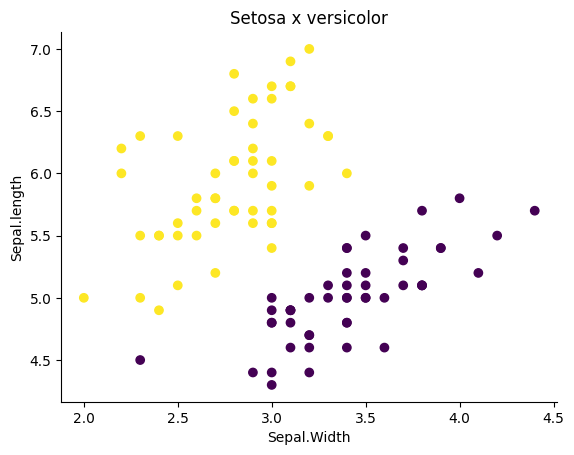

In [6]:
# Plotando o gráfico para verificar se as amostras são linearmente separáveis
plt.scatter(X[:, 1], X[:,0], c=y)
plt.title('Setosa x versicolor')
plt.xlabel('Sepal.Width')
plt.ylabel('Sepal.length')
sns.despine()
plt.show()

### Pré-processamento para normalização dos dados e separação das amostras

In [7]:
# Normaliza os dados
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

# Separa o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Treinamento da Rede Neural Artificial Adaline

In [8]:
# Cria as fronteiras de decisão com Adaline
rede = Adaline(eta=.001, epoch=1_000, goal=.000001)
rede.fit(X_train, y_train)

### Apresentação gráfica do processo de treinamento

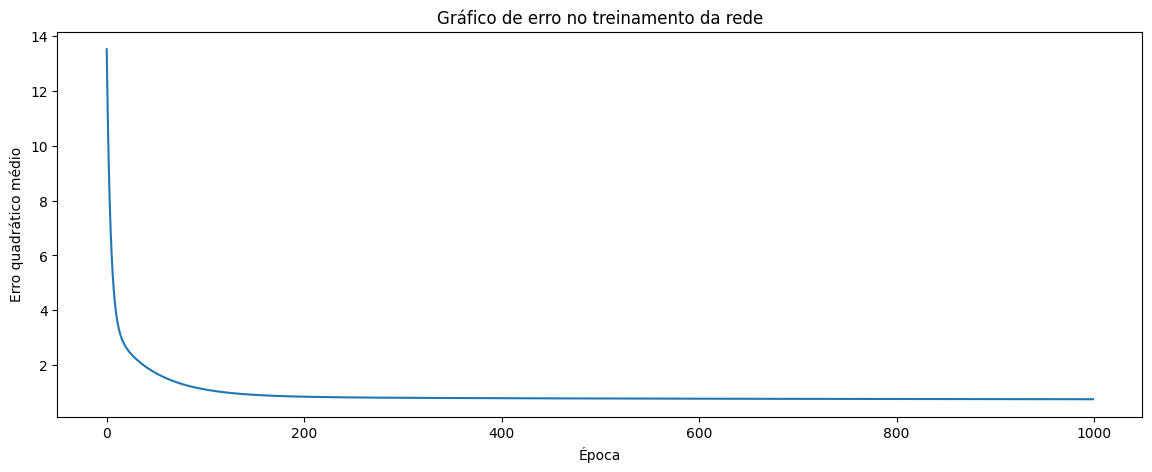

In [9]:
# Plota a descida do gradiente
plt.figure(figsize=(14, 5))
ax = plt.subplot()
ax.plot(range(len(rede.mse_)), rede.mse_)
ax.set_ylabel('Erro quadrático médio')
ax.set_xlabel('Época')
ax.set_title('Gráfico de erro no treinamento da rede')
plt.show()